***
<span style="color:#008385">

**15-448: Machine Learning in a Nutshell**, *CMU-Qatar* Spring'20

**Gianni A. Di Caro**, www.giannidicaro.com

<u>Disclaimer:</u> This notebook was prepared for teaching purposes. It can include material from different web sources. I'll happy to explicitly acknowledge a source if required. 
</span>
***

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Clustering-examples-(continued)" data-toc-modified-id="Clustering-examples-(continued)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Clustering examples (continued)</a></span><ul class="toc-item"><li><span><a href="#Clustering-cancer-data" data-toc-modified-id="Clustering-cancer-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Clustering cancer data</a></span></li><li><span><a href="#Clustering-on-synthetic-data-blobs" data-toc-modified-id="Clustering-on-synthetic-data-blobs-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Clustering on synthetic data blobs</a></span></li></ul></li><li><span><a href="#Step-by-step-K-Means" data-toc-modified-id="Step-by-step-K-Means-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Step-by-step K-Means</a></span></li><li><span><a href="#K-means-algorithm-and-Expectation–Maximization-(EM)" data-toc-modified-id="K-means-algorithm-and-Expectation–Maximization-(EM)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>K-means algorithm and Expectation–Maximization (EM)</a></span></li><li><span><a href="#Assumptions-(and-Limitations)-of-K-Means-/-EM-approach" data-toc-modified-id="Assumptions-(and-Limitations)-of-K-Means-/-EM-approach-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Assumptions (and Limitations) of K-Means / EM approach</a></span><ul class="toc-item"><li><span><a href="#The-number-of-clusters-must-be-selected-beforehand" data-toc-modified-id="The-number-of-clusters-must-be-selected-beforehand-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>The number of clusters must be selected beforehand</a></span><ul class="toc-item"><li><span><a href="#Wrong-clustering-because-of-wrongly-selected-number-of-clusters" data-toc-modified-id="Wrong-clustering-because-of-wrongly-selected-number-of-clusters-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Wrong clustering because of wrongly selected number of clusters</a></span></li><li><span><a href="#How-to-select-the-right-number-of-clusters?" data-toc-modified-id="How-to-select-the-right-number-of-clusters?-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>How to select the right number of clusters?</a></span><ul class="toc-item"><li><span><a href="#Elbow-method" data-toc-modified-id="Elbow-method-4.1.2.1"><span class="toc-item-num">4.1.2.1&nbsp;&nbsp;</span>Elbow method</a></span></li></ul></li></ul></li><li><span><a href="#Local-minima:-no-guarantees-of-reaching-the-global-minimum" data-toc-modified-id="Local-minima:-no-guarantees-of-reaching-the-global-minimum-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Local minima: no guarantees of reaching the global minimum</a></span></li><li><span><a href="#Linear-boundaries-between-clusters" data-toc-modified-id="Linear-boundaries-between-clusters-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Linear boundaries between clusters</a></span></li><li><span><a href="#Imbalanced-datasets:-prior-cluster-probabilities-are-significantly-different" data-toc-modified-id="Imbalanced-datasets:-prior-cluster-probabilities-are-significantly-different-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Imbalanced datasets: prior cluster probabilities are significantly different</a></span></li><li><span><a href="#Unequal-variances,-covariances,--and-scaling-issues" data-toc-modified-id="Unequal-variances,-covariances,--and-scaling-issues-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Unequal variances, covariances,  and scaling issues</a></span></li><li><span><a href="#Computational-issues-for-large-datasets" data-toc-modified-id="Computational-issues-for-large-datasets-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Computational issues for large datasets</a></span></li></ul></li></ul></div>

# Clustering examples (continued)

## Clustering cancer data

Let's use one of the *labeled* datasets from sklearn. 

In this case, we can learn in unsupervised manner but also enjoy the fact that <u>data have labels,</u> such that we can compare the result of clustering with the original labeling.

In [5]:
import numpy as np
from sklearn.datasets import load_breast_cancer

# load data
cancer_data = load_breast_cancer()

features = cancer_data.data
targets = cancer_data.target

print(features.shape, '\n', cancer_data.feature_names, '\n')
print(cancer_data.DESCR)

(569, 30) 
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension'] 

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in

There are two labels / classes:
class:
    - WDBC-Malignant
    - WDBC-Benign
Therefore, we should use **two clusters** ...

In [6]:
from sklearn.cluster import KMeans

n_clusters=2

kmeans = KMeans(n_clusters=n_clusters)

kmeans.fit(features)

# label each feature vector with a cluster identifier
labels = kmeans.labels_
print(labels[:50], '\n')

# coordinates of the cluster centers in the 30-dimensional feature space
centers = kmeans.cluster_centers_


np.set_printoptions(precision=2)
print('Center of cluster 0: \n{}\n'.format(centers[0]))
print('Center of cluster 1: \n{}\n'.format(centers[1]))

[1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0
 0 0 0 0 0 1 0 0 1 0 0 0 0] 

Center of cluster 0: 
[1.26e+01 1.86e+01 8.11e+01 4.96e+02 9.49e-02 9.11e-02 6.24e-02 3.34e-02
 1.78e-01 6.35e-02 3.04e-01 1.22e+00 2.15e+00 2.38e+01 7.17e-03 2.35e-02
 2.87e-02 1.06e-02 2.06e-02 3.75e-03 1.40e+01 2.47e+01 9.19e+01 6.20e+02
 1.30e-01 2.23e-01 2.19e-01 9.13e-02 2.84e-01 8.33e-02]

Center of cluster 1: 
[1.94e+01 2.17e+01 1.28e+02 1.19e+03 1.01e-01 1.49e-01 1.77e-01 1.01e-01
 1.92e-01 6.06e-02 7.43e-01 1.22e+00 5.25e+00 9.57e+01 6.60e-03 3.22e-02
 4.24e-02 1.57e-02 2.03e-02 3.95e-03 2.37e+01 2.89e+01 1.58e+02 1.75e+03
 1.40e-01 3.58e-01 4.49e-01 1.92e-01 3.12e-01 8.62e-02]



But, **can we visualize the clusters with the actual labels for comparison?**

We are dealing with 30 features and visualizing the clusters on a 30-dimensional feature space would be impossible to interpret or even perform. 

Hence, we will leverage **PCA (Principal Components Analysis) to reduce the input dimensions to two principal components** and visualize the clusters on top of the same.

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca_reduced_features = pca.fit_transform(features)

pca_reduced_features.shape
#pca_reduced_features

(569, 2)

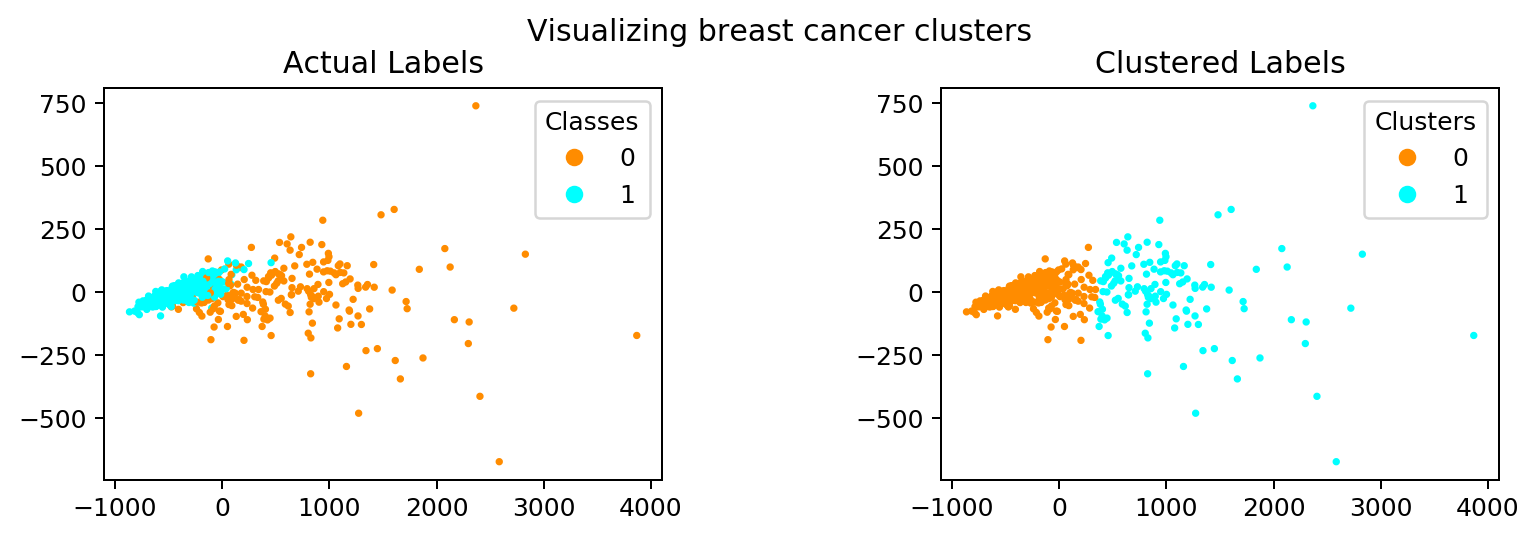

In [8]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.dpi']= 180 # set the resolution to x dpi

from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['darkorange', 'c', 'blue', 'darkred', 'lime', 'cyan'])


fig, subplots = plt.subplots(1, 2, figsize=(10, 3))
fig.suptitle('Visualizing breast cancer clusters')
fig.subplots_adjust(top=0.85, wspace=0.5)

subplots[0].set_title('Actual Labels')
subplots[1].set_title('Clustered Labels')

x1 = pca_reduced_features[:, 0]
x2 = pca_reduced_features[:, 1]

scatter = subplots[0].scatter(x1, x2, c=targets, marker='.', s=15, cmap=cmap_bold)

# produce a legend with the unique colors from the scatter
subplots[0].legend(*scatter.legend_elements(), loc="upper right", title="Classes")


scatter = subplots[1].scatter(x1, x2, c=labels, marker='.', s=15, cmap=cmap_bold)

# produce a legend with the unique colors from the scatter
subplots[1].legend(*scatter.legend_elements(), loc="upper right", title="Clusters")
plt.show()

Note: cluster 0 doesn't have to correspond to label 0! 

The cluster plot shows that indeed the result of clustering is very close to the original labeling

## Clustering on synthetic data blobs

The `sklearn.dataset` module offers a number of methods for **generating synthetic datasets**

(300, 2)

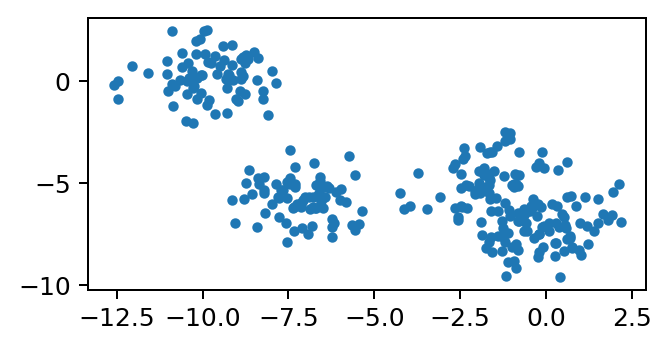

In [9]:
from sklearn.datasets.samples_generator import make_blobs

features, targets = make_blobs(n_samples=300, n_features=2, centers=4,
                               cluster_std=1, random_state=9)

plt.figure(figsize=(4, 2))
plt.scatter(features[:, 0], features[:, 1], s=10)

features.shape

Let's try out with different cluster numbers to see the effect on the resulting clustering

In [10]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters)

kmeans.fit(features)

centers = kmeans.cluster_centers_

labels = kmeans.labels_

centers_labels = kmeans.predict(centers)

#print(labels)
#print(centers_labels)

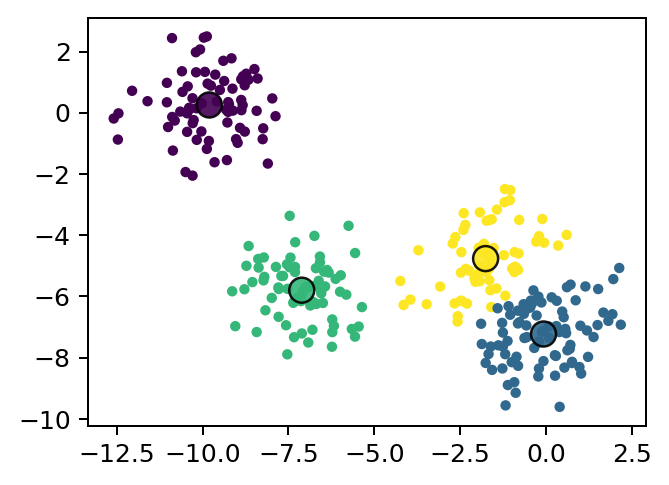

In [11]:
plt.figure(figsize=(4, 3))

# plot the data points with the assiged cluster labels
plt.scatter(features[:, 0], features[:, 1], c=labels, s=10, cmap='viridis')

# plot the centers, with their cluster labels
plt.scatter(centers[:, 0], centers[:, 1], c=centers_labels, s=100, 
                alpha=0.9, cmap='viridis', edgecolors='black')

plt.show()

*New data features* will be  clustered according to the centers found with the training data.

In [12]:
# features generated randomly according to a Normal distribution
new_features = features + 1.5 * np.random.randn( features.shape[0], 
                                                features.shape[1] ) + 1

new_labels = kmeans.predict(new_features)

new_labels

array([0, 2, 1, 2, 3, 1, 3, 1, 3, 0, 0, 3, 3, 2, 3, 3, 2, 3, 2, 2, 1, 1,
       3, 2, 1, 2, 3, 3, 0, 2, 1, 3, 2, 3, 1, 3, 2, 1, 0, 3, 0, 0, 2, 0,
       0, 1, 2, 1, 3, 1, 2, 2, 2, 0, 2, 2, 1, 1, 1, 3, 0, 2, 3, 2, 0, 1,
       1, 0, 0, 1, 0, 3, 3, 3, 2, 1, 2, 3, 0, 1, 3, 0, 0, 0, 3, 3, 0, 0,
       0, 3, 2, 3, 1, 0, 0, 2, 1, 3, 0, 0, 1, 1, 2, 1, 0, 1, 3, 3, 2, 2,
       1, 1, 2, 0, 2, 1, 3, 1, 1, 0, 0, 3, 1, 0, 0, 0, 0, 1, 0, 2, 3, 3,
       1, 3, 0, 1, 2, 1, 2, 0, 0, 2, 1, 1, 3, 3, 3, 0, 0, 1, 0, 1, 3, 3,
       0, 2, 1, 3, 1, 1, 3, 3, 2, 0, 1, 0, 1, 1, 2, 1, 3, 0, 0, 2, 3, 3,
       3, 2, 3, 0, 3, 0, 1, 1, 3, 3, 3, 3, 1, 3, 1, 1, 2, 0, 2, 0, 3, 1,
       3, 1, 3, 0, 3, 0, 1, 3, 3, 2, 0, 0, 0, 1, 1, 3, 2, 2, 3, 1, 0, 2,
       2, 0, 3, 1, 2, 0, 1, 3, 1, 3, 2, 3, 2, 2, 2, 0, 2, 0, 2, 2, 3, 0,
       0, 0, 0, 2, 2, 3, 1, 2, 1, 1, 1, 3, 3, 1, 1, 2, 0, 1, 1, 2, 0, 3,
       0, 0, 0, 3, 0, 1, 0, 1, 0, 1, 0, 1, 3, 0, 1, 0, 2, 2, 3, 0, 2, 3,
       1, 3, 3, 0, 1, 2, 1, 1, 0, 0, 0, 0, 3, 3], d

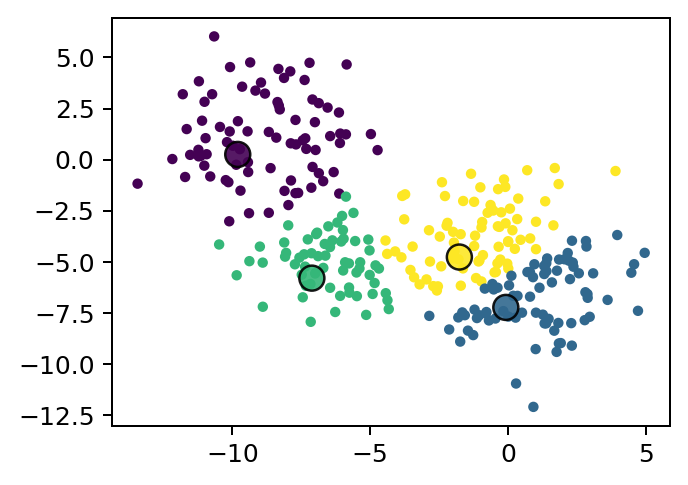

In [13]:
plt.figure(figsize=(4, 3))

#plt.scatter(features[:, 0], features[:, 1], c=labels, s=10, cmap='viridis')

centers = kmeans.cluster_centers_

# plot the new data points with the assiged cluster labels
plt.scatter(new_features[:, 0], new_features[:, 1], c=new_labels, s=10, cmap='viridis')

# plot the centers, with their cluster labels
plt.scatter(centers[:, 0], centers[:, 1], c=centers_labels, s=100, 
                alpha=0.9, cmap='viridis', edgecolors='black')

# Step-by-step K-Means

Let's call K-Means incrementally, one step at-a-time, by using each time the cluster centers from the last call as input for the initial placement. Initial cluster center is purely random.

[[  1.69   5.27]
 [ 10.09   4.58]
 [-11.58  -5.7 ]
 [  8.05  -4.74]
 [  7.36  -3.37]]


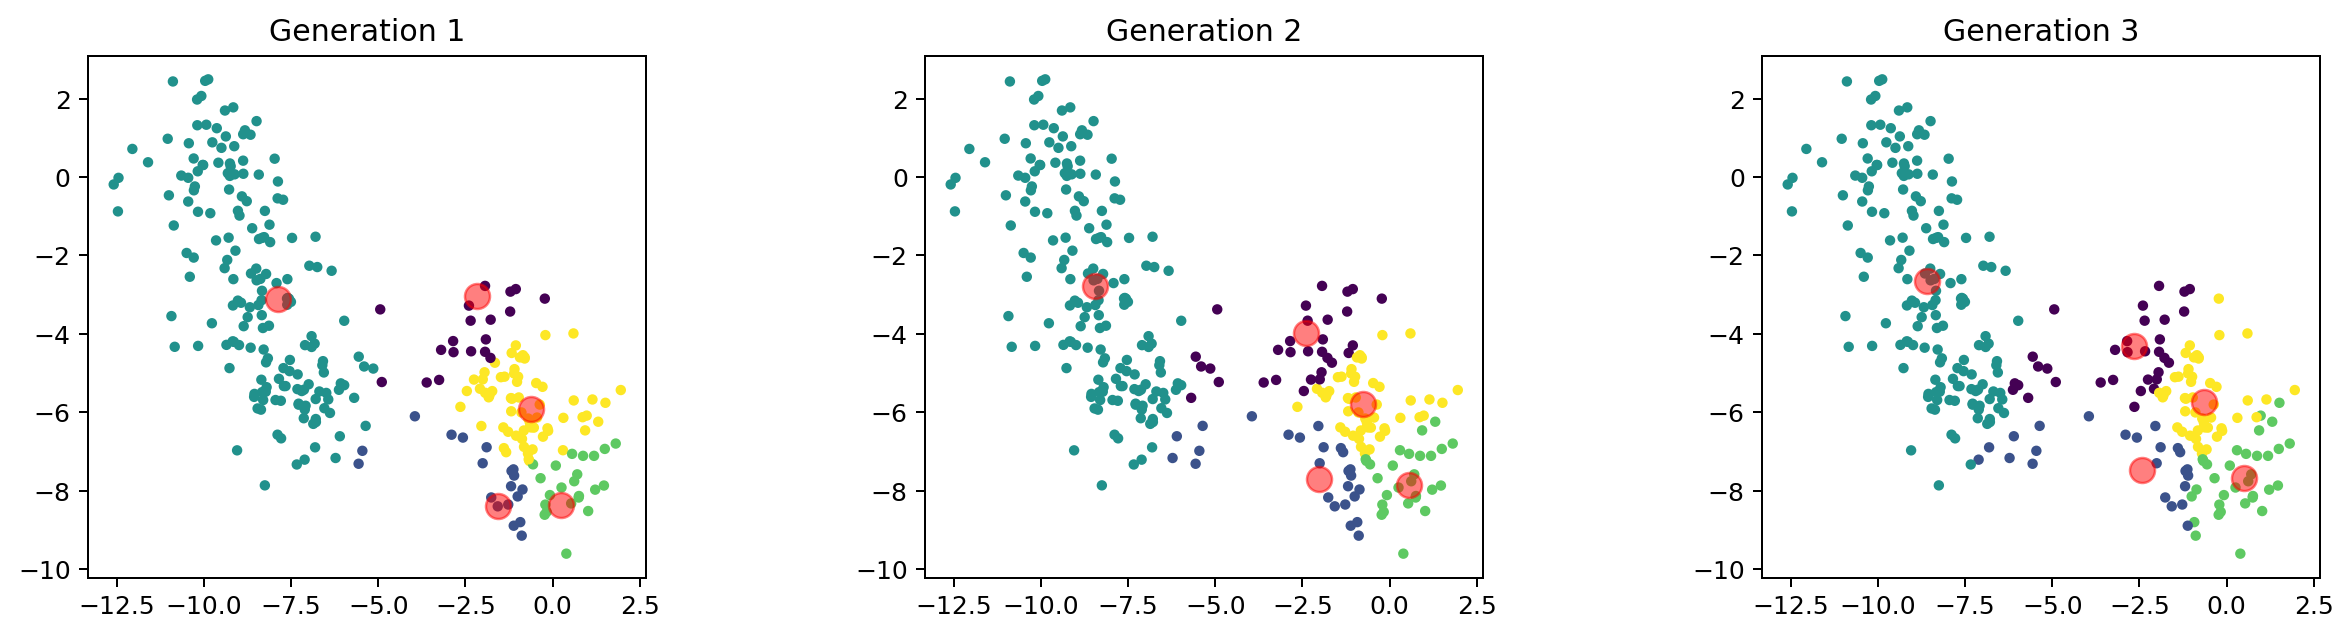

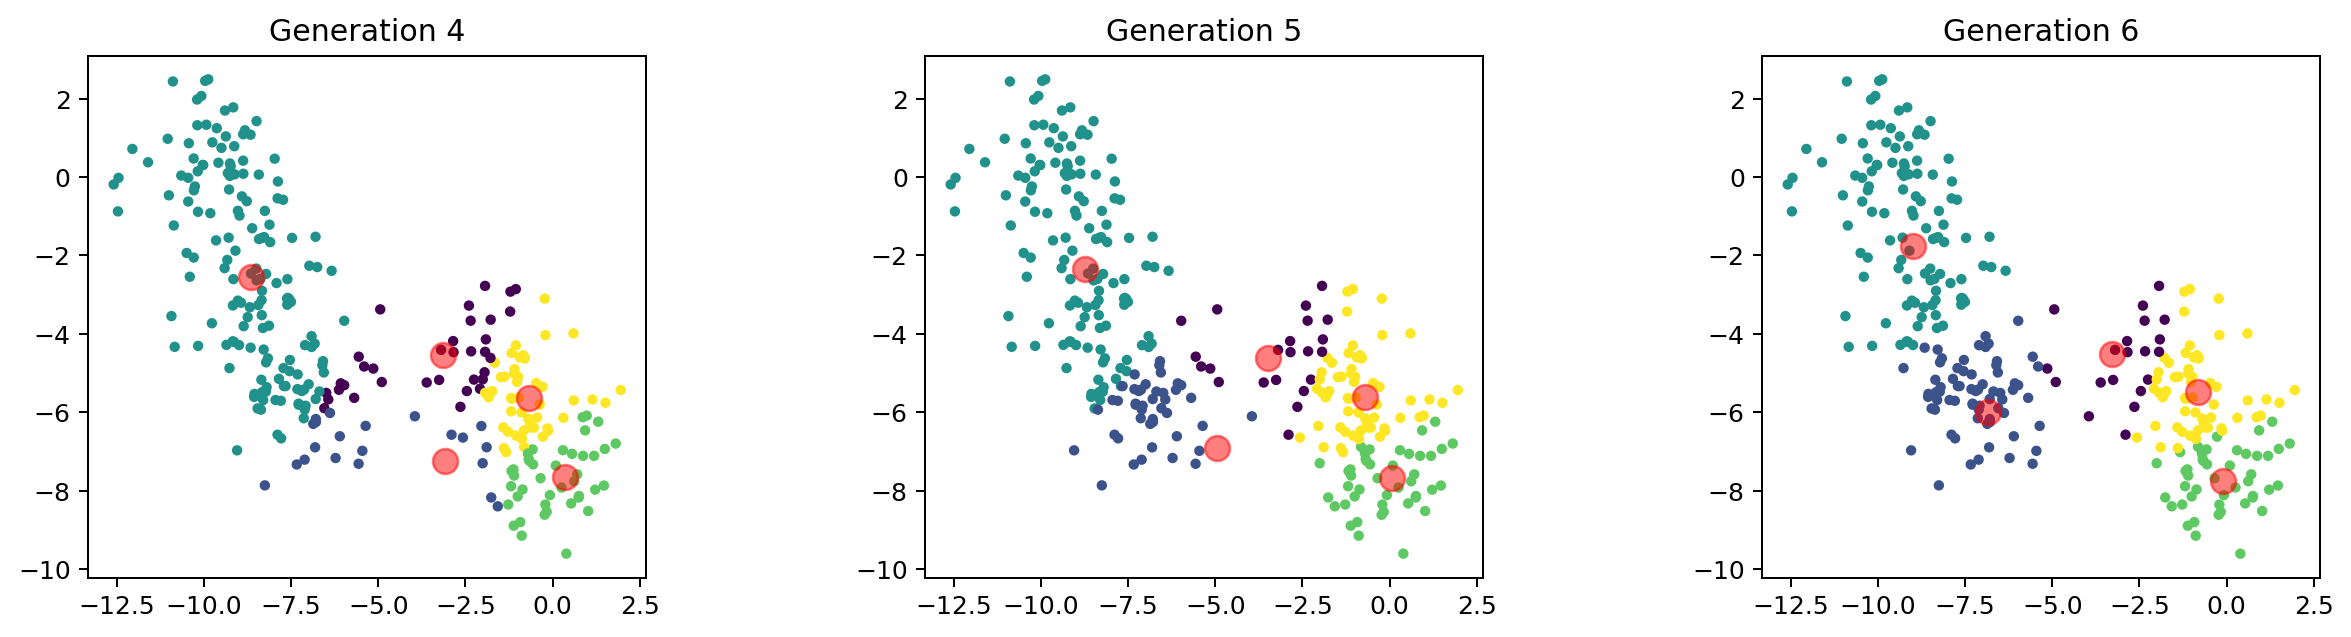

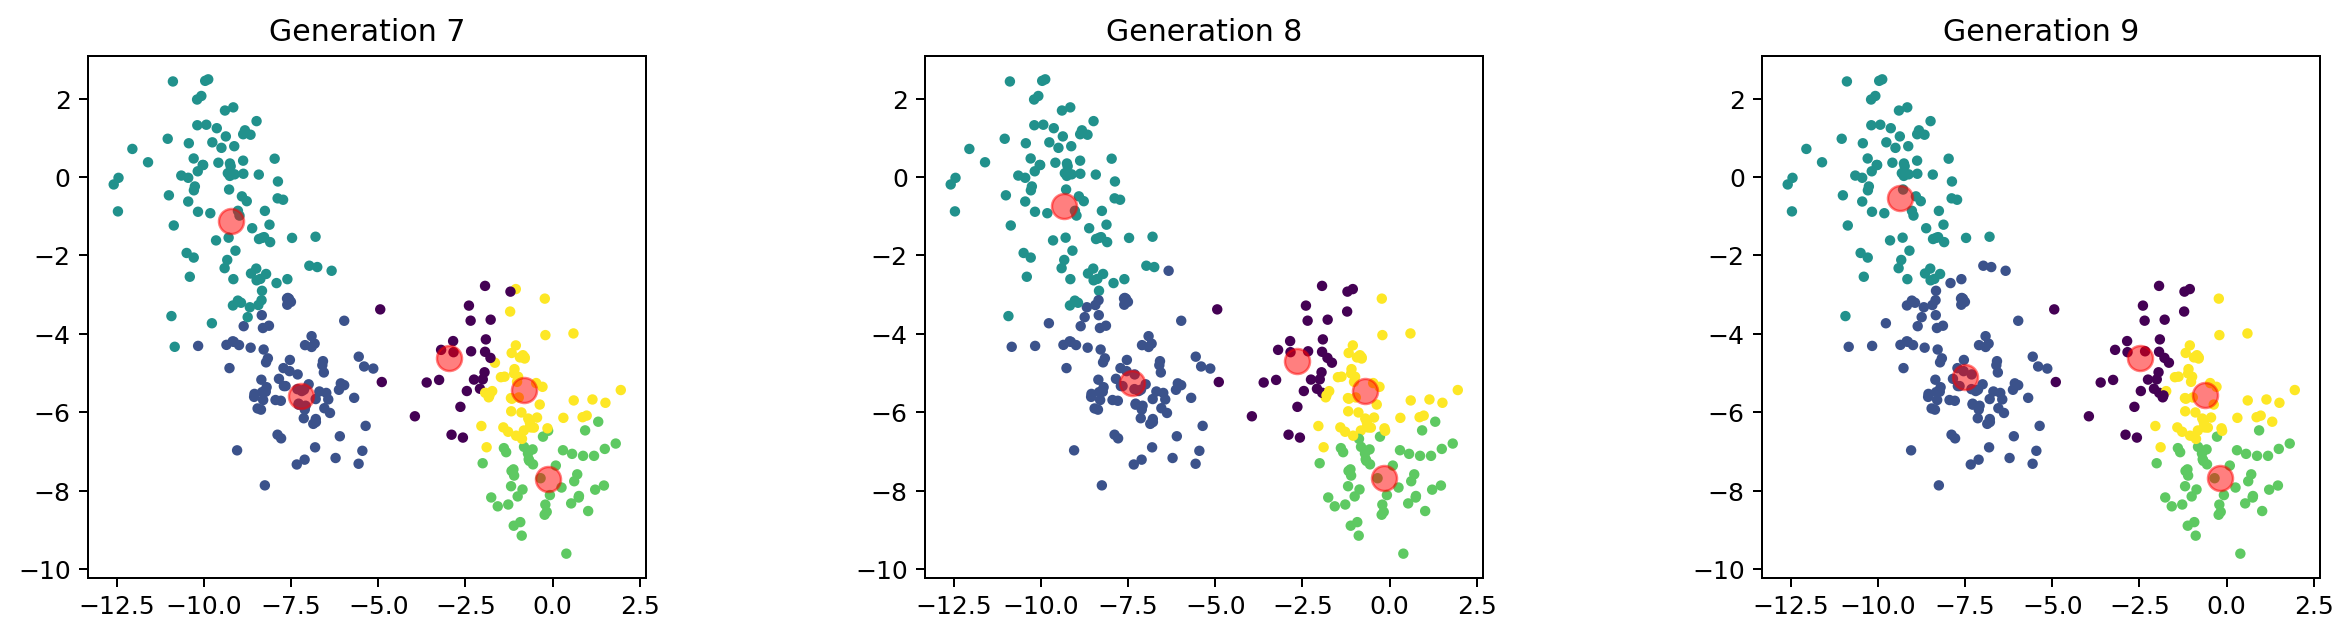

In [15]:
from sklearn.cluster import KMeans
import numpy as np

# re-generate the data, four data blobs
features, targets = make_blobs(n_samples=300, n_features=2, centers=5,
                               cluster_std=1, random_state=9)

n_clusters = 5

plots_in_row = 3
fig, subplots = plt.subplots(1, 3, figsize=(16, 4))
fig.subplots_adjust(top=0.85, wspace=0.5)

generations = 9

# change the random seed to change initial placement
seed = 222

for t in range(generations):
    if t == 0: # random initialization of the centers
        
        features_min = np.array( [np.min(features[:, 0]), np.min(features[:, 1])] ).reshape((2,1))
        features_max = np.array( [np.max(features[:, 0]), np.max(features[:, 1])] ).reshape((2,1))
        
        # set the centers at random locations in the feature space
        np.random.seed(seed)
        init_centers = np.random.random( size=(n_clusters, features.shape[1]))
        init_centers *= (features_max - 2*features_min).T
        init_centers += features_min.T
        print(init_centers)
        
        kmeans = KMeans(init=init_centers, n_clusters=n_clusters, max_iter=1, 
                        n_init=1)
        
    else: # set the center at the positions computed by k-means in the previous iteration
        kmeans = KMeans(init=centers, n_clusters=n_clusters, max_iter=1, n_init=1)
        
    kmeans.fit(features)
    centers = kmeans.cluster_centers_   
    labels = kmeans.labels_

    subplot_index = t % plots_in_row
    subplots[subplot_index].set_title('Generation {}'.format(t+1))
    subplots[subplot_index].scatter(features[:, 0], features[:, 1], c=labels, s=10, cmap='viridis')
    subplots[subplot_index].scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.5)
    plt.draw()
    if subplot_index == (plots_in_row-1):
        plt.show()
        if t != generations-1:
            fig, subplots = plt.subplots(1, 3, figsize=(16, 4))
            fig.subplots_adjust(top=0.85, wspace=0.5)

Another evolution, starting from a different initial random positioning of the centers.

[[ -8.44  -3.04]
 [-10.9    0.38]
 [ 10.07  10.52]
 [  7.14   7.07]]


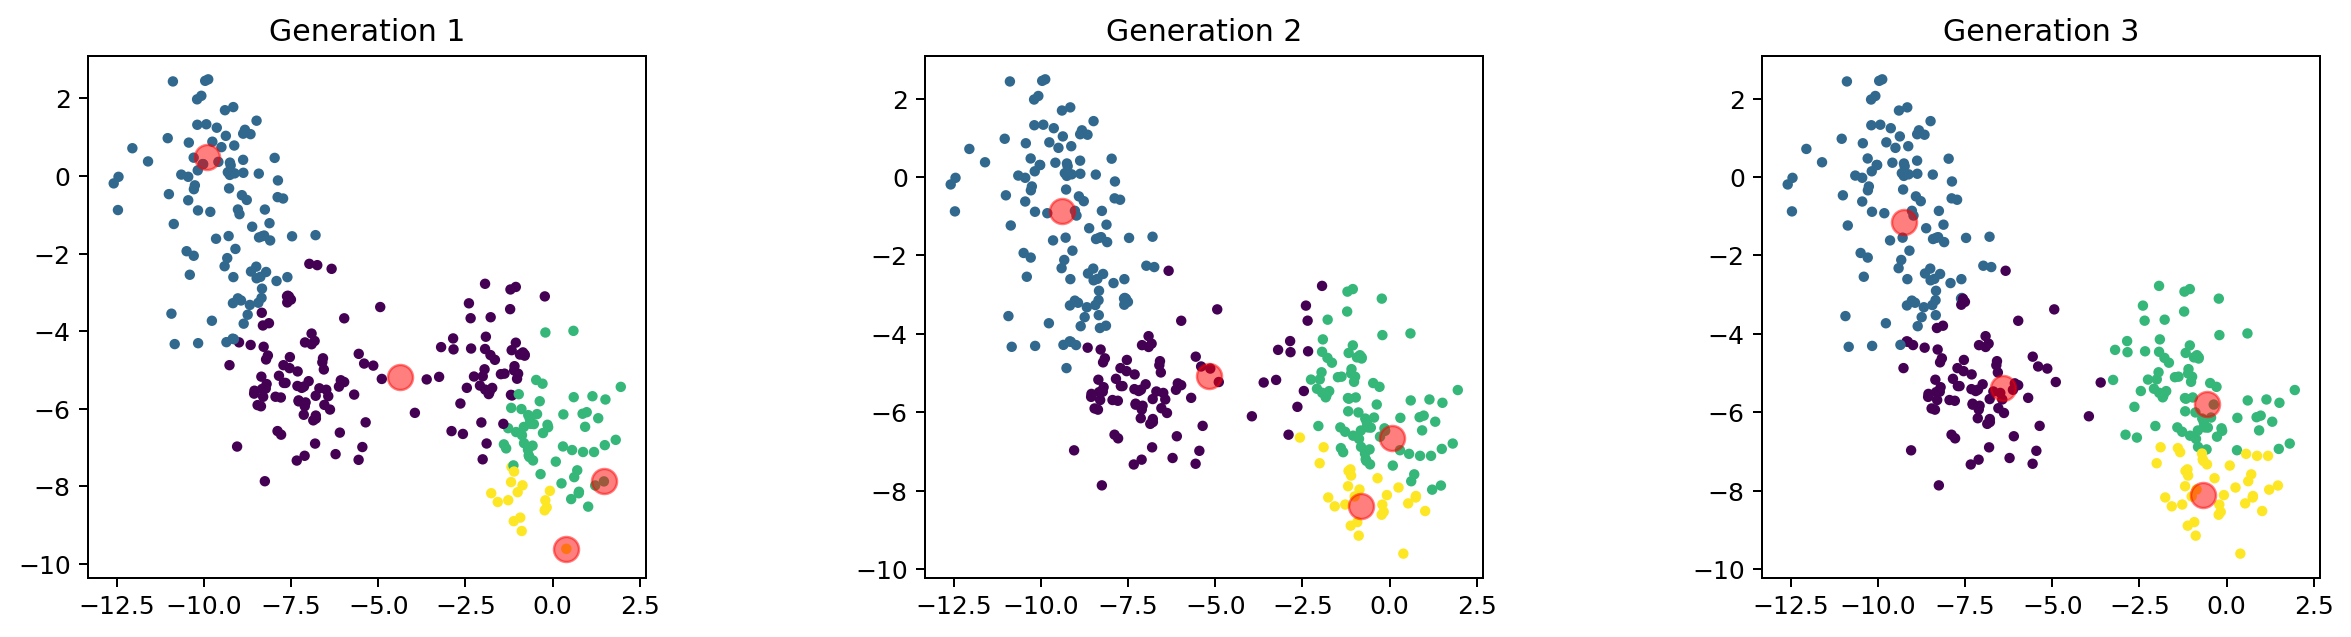

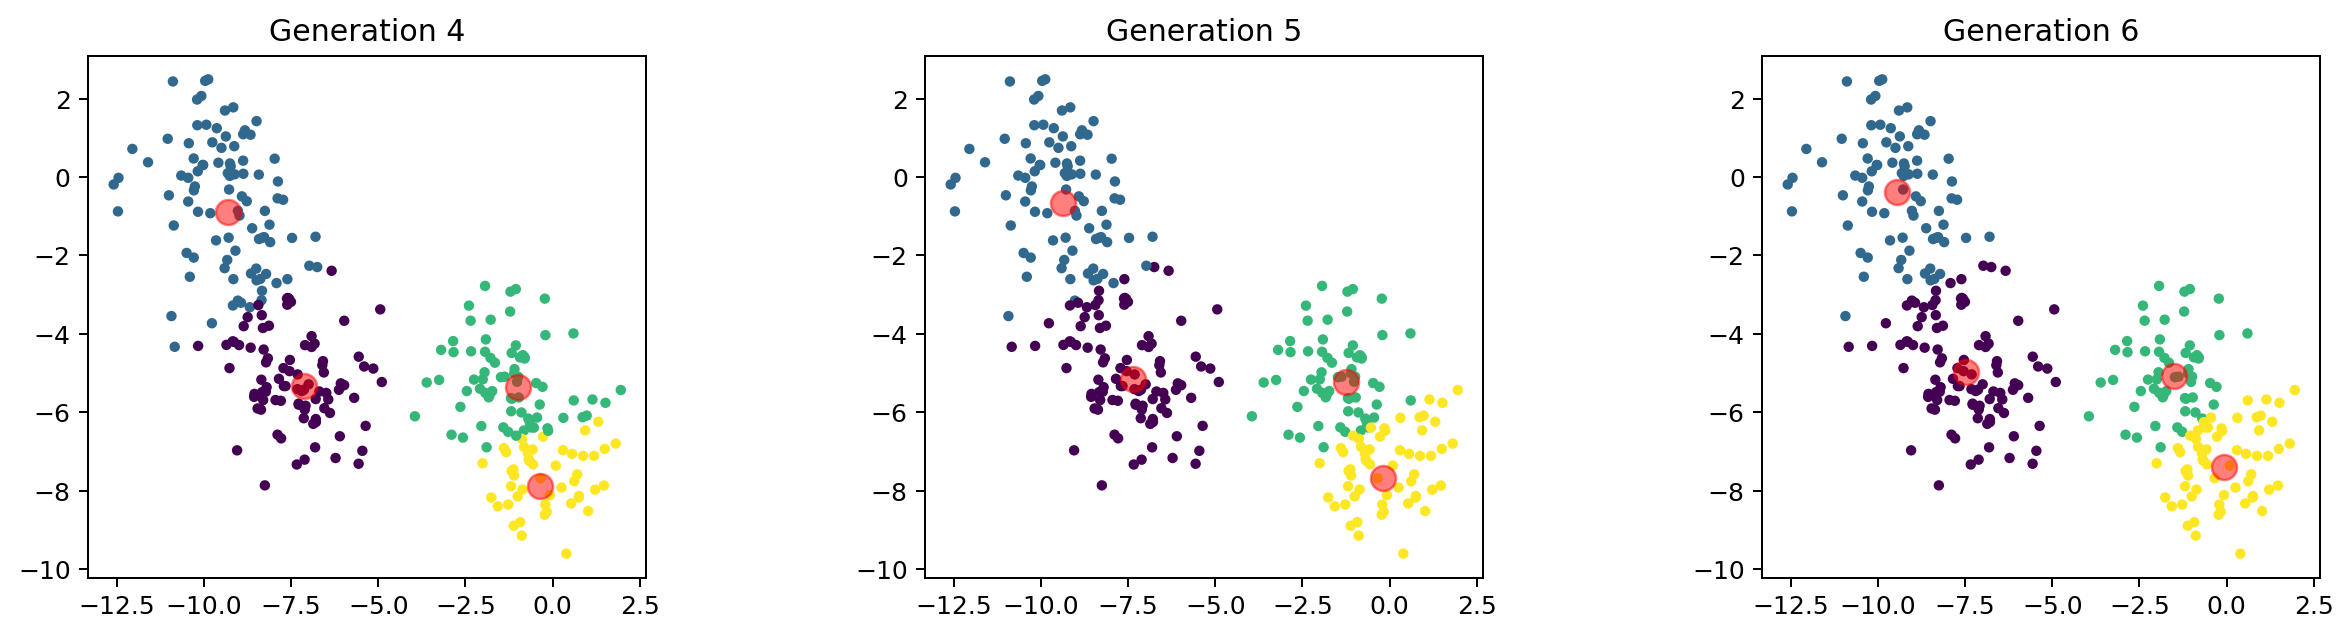

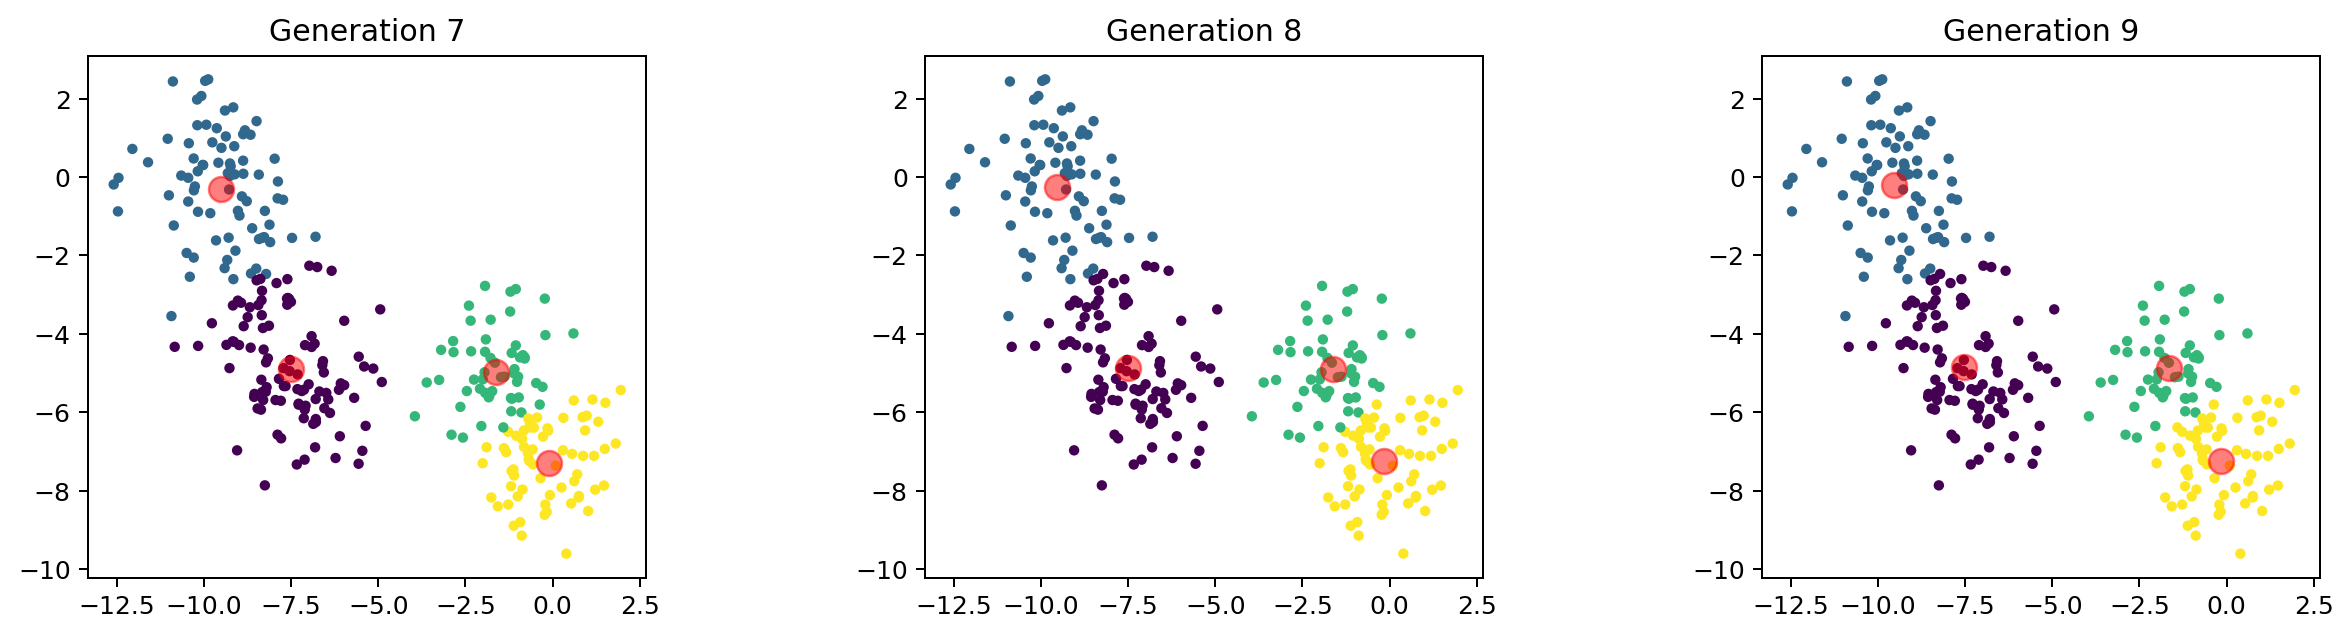

In [16]:
n_clusters = 4

plots_in_row = 3
fig, subplots = plt.subplots(1, 3, figsize=(16, 4))
fig.subplots_adjust(top=0.85, wspace=0.5)

generations = 9

# change the random seed to change initial placement
seed = 777

for t in range(generations):
    if t == 0:

        features_min = np.array( [np.min(features[:, 0]), np.min(features[:, 1])] ).reshape((2,1))
        features_max = np.array( [np.max(features[:, 0]), np.max(features[:, 1])] ).reshape((2,1))
        
        # set the centers at random locations in the feature space
        np.random.seed(seed)
        init_centers = np.random.random( size=(n_clusters, features.shape[1]))
        init_centers *= (features_max - 2*features_min).T
        init_centers += features_min.T
        print(init_centers)
        
        kmeans = KMeans(init=init_centers, n_clusters=n_clusters, 
                        max_iter=1, 
                        n_init=1)
    else:
        kmeans = KMeans(init=centers, n_clusters=n_clusters, max_iter=1, n_init=1)
                        
    kmeans.fit(features)
    centers = kmeans.cluster_centers_   
    labels = kmeans.labels_

    subplot_index = t % plots_in_row
    subplots[subplot_index].set_title('Generation {}'.format(t+1))
    subplots[subplot_index].scatter(features[:, 0], features[:, 1], c=labels, s=10, cmap='viridis')
    subplots[subplot_index].scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.5)
    plt.draw()
    if subplot_index == (plots_in_row-1):
        plt.show()
        if t != generations-1:
            fig, subplots = plt.subplots(1, 3, figsize=(16, 4))
            fig.subplots_adjust(top=0.85, wspace=0.5)

# K-means algorithm and Expectation–Maximization (EM)

The **Expectation–Maximization (EM)**  algorithm is an <u>iterative method to find the best estimates of parameters in statistical models,</u> where the model depends on **unobserved hidden variables.** In the case of clustering, the *cluster centers* are indeed hidden variables that cannot be observed directly, but only estimated indirectly.  

<u>K-means is an instance application of the EM algorithm.</u> The EM approach in K-means consists of the following procedure:

- Set some **initial cluster centers**<br><p>
- <u>Repeat until convergence:</u>
    1. **E-Step:** assign each data point to the cluster whose center is the nearest to the data point<br><p>
    1. **M-Step:** set each cluster center to the mean of the points (currently) in the cluster
    
    
In the *Expectation step*, the algorithm looks at the current cluster centers as the expected cluster placement and assigns the data points to the clusters accordingly (based on minimizing the distance from the cluster center).

In the *Maximization step*, cluster centers are revised to maximize the objective function, that consists in minimizing the sum of the squared distances of the points in each cluster from the cluster center (i.e., minimize the intra-cluster distances). Accordingly, each cluster center is assigned to the mean of the points in the cluster.

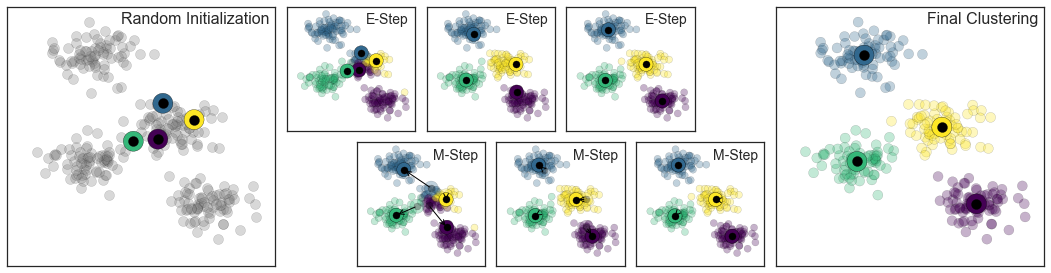

# Assumptions (and Limitations) of K-Means / EM approach

***
**K-Means relies on a set of modeling assumptions.** If any of the assumptions is not satisfied the algorithm can *fail* finding a satisfactory clustering.

1. There are **$K$ clusters.** <br><p>

1. The sum of squared Euclidean distances (SSD) from the means / centroids of the clusters is the **right objective to minimize.**<br><p>

1. All variables have the **same importance for every clusters.** 
***

***
These assumptions *work well* once we assume that, in <u>statistical terms</u> the data has the following characteristics:

1. Data in each of the $K$ clusters has been generated from a **different multivariate Gaussian,** $G(\mu_c, \sigma_c)$, such that the spreading about the centers $\mu_c, \ c=1,\ldots K$, is only due to Gaussian noise.<br><p>

1. **The Gaussian noise is isotropic in the feature space,** meaning that all cluster variables have more or less **the same variance,** resulting in a spherical distribution of the data about the centers, where $\sigma_c$ is about the same for all clusters.<br><p>

1. The prior probability for all $K$ clusters is the same, such that **each cluster has roughly equal number of observations.**


Indeed, <u>these are pretty strong assumptions!</u>
***

<u>**Ideal** cluster data for K-means:</u> All nicely Gaussian data with the same variance for all variables (spherical) and same number of points per cluster. 

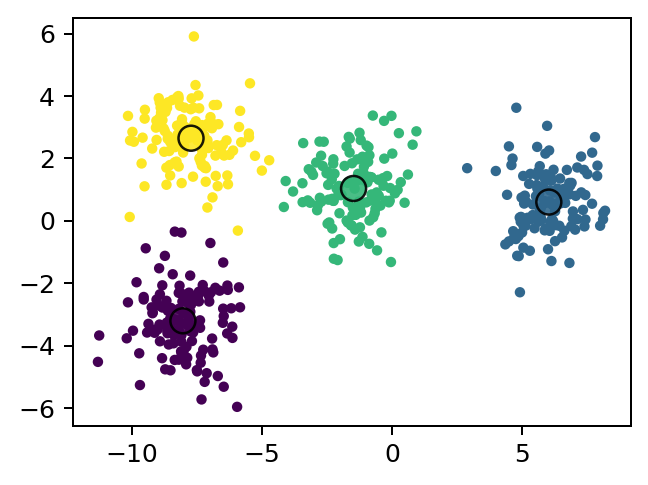

In [17]:
# re-generate the data, four data blobs
features, targets = make_blobs(n_samples=500, n_features=2, centers=4,
                               cluster_std=1, random_state=999)

n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters)

kmeans.fit(features)

centers = kmeans.cluster_centers_

labels = kmeans.labels_

centers_labels = kmeans.predict(centers)

plt.figure(figsize=(4, 3))

#plt.scatter(features[:, 0], features[:, 1], c=labels, s=10, cmap='viridis')

plt.scatter(features[:, 0], features[:, 1], c=labels, s=10, cmap='viridis')

plt.scatter(centers[:, 0], centers[:, 1], c=centers_labels, s=100, 
                alpha=0.9, cmap='viridis', edgecolors='black')
plt.show()

##  The number of clusters must be selected beforehand

K-means requires to input how many clusters have to be found: it cannot learn the number of clusters from the data. Therefore, our inductive bias about how many clusters / classes is needed and must be a sound one!

E.g., If we tell K-means that six clusters have to be found, the algorithm will proceed to find the best six clusters, even if apparently the most appropriate number of clusters would be 3, or 4 at the most.

### Wrong clustering because of wrongly selected number of clusters

In the example below, constructed to have three distinct cluster blobs, K-means searches for only two clusters.

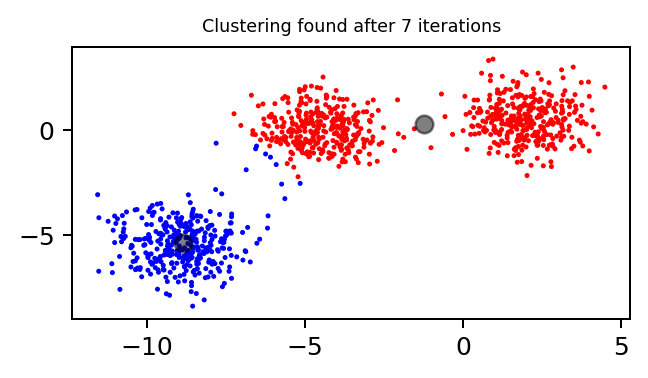

In [18]:
n_samples = 1000
features, targets = make_blobs(n_samples=n_samples, centers=3, random_state=170)

# Incorrect number of clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(features)

labels = kmeans.labels_
centers = kmeans.cluster_centers_

plt.figure(figsize=(4, 2))
plt.scatter(features[:, 0], features[:, 1], c=labels, s=1, cmap='bwr')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=0.5)
plt.title('Clustering found after {} iterations'.format(kmeans.n_iter_), {'fontsize': '7'})
plt.show()

Cluster centers are placed by K-Means *assuming* an isotropic distribution of the data about the centers

This is the previous example above, with four data blobs. In this case, if we tell K-means that six clusters have to be found, the algorithm will proceed to find the best six clusters, even if apparently the most appropriate number of clusters would be 3, or 4 at the most:

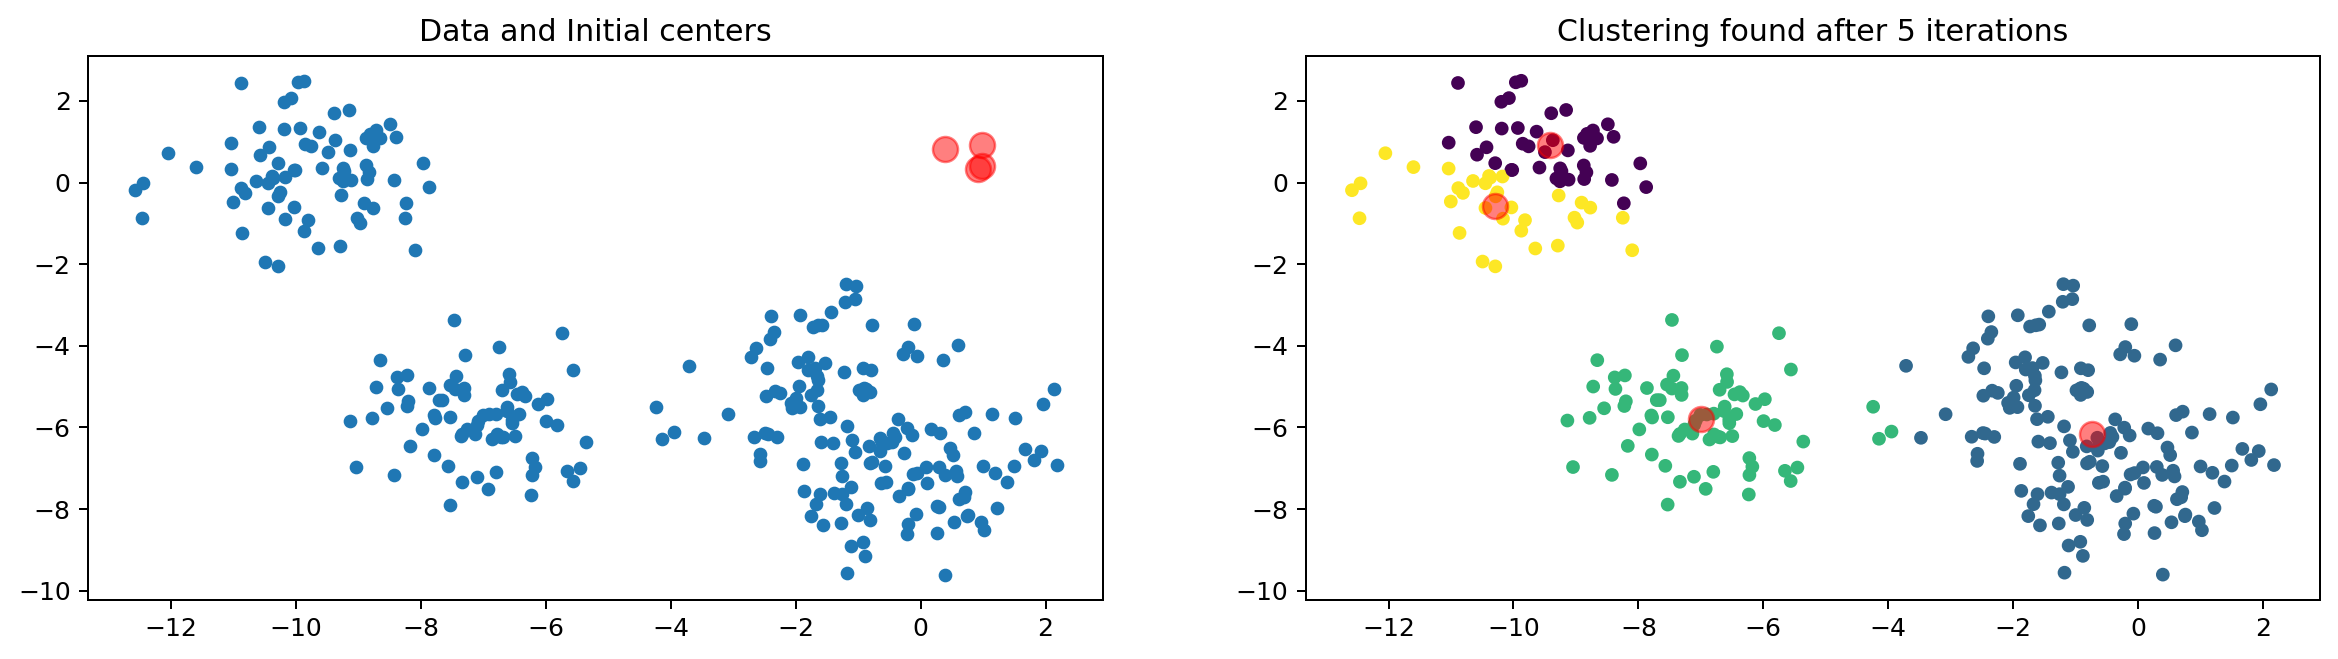

In [19]:
# re-generate the data, four data blobs
features, targets = make_blobs(n_samples=300, n_features=2, centers=4,
                               cluster_std=1, random_state=9)

n_clusters = 4

# set the initial centers in a totally (arbitrary) random uniform way in [0,1]
np.random.seed(1243)
initial_centers = np.random.random(size=(n_clusters,2))


# show the initial centers with the data
fig, subplots = plt.subplots(1, 2, figsize=(16, 4))
subplots[0].set_title('Data and Initial centers')
subplots[0].scatter(features[:, 0], features[:, 1], s=20, cmap='viridis')
subplots[0].scatter(initial_centers[:, 0], initial_centers[:, 1], c='red', 
                    s=100, alpha=0.5)

'''
# do this if want to retrieve the initial centers generates by K-means 
kmeans = KMeans(init='random', n_clusters=n_clusters, max_iter=1, n_init = 1)
kmeans.fit(np.random.random(size=(10,2))) # generate some random feature values
initial_centers = kmeans.cluster_centers_
'''

kmeans = KMeans(init=initial_centers, n_clusters=n_clusters, n_init=1)

kmeans.fit(features)
centers = kmeans.cluster_centers_   
labels = kmeans.labels_

# plot the found clustering 
subplots[1].set_title('Clustering found after {} iterations'.format(kmeans.n_iter_))
subplots[1].scatter(features[:, 0], features[:, 1], c=labels, s=20, cmap='viridis')

centers = kmeans.cluster_centers_
subplots[1].scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.5)

plt.show()

### How to select the right number of clusters?

Without labels, there's no exact way to define the *right* number of clusters.

Clustering algorithms such as the `DBSCAN` and `OPTICS` algorithms do not require the specification of the number of clusters in advance. **Hierarchical Clustering** avoids the problem altogether. 

With K-Means and other partitioning methods, clusters are defined such that 
that the **total intra-cluster variation** is minimized. In particular, in K-Means this variation is expressed in terms of the **total within-cluster sum of squared distances from the centroids** (WCSSD) is minimized.

The total WCSSD measures the *compactness* of the clustering and the <u>goal is to make it to be as small as possible.</u>

However, increasing $K$ will always reduce the WCSSD, to the extreme case of zero variation if each data point is considered its own cluster (i.e., when $K$ equals the number of data points, $n$). 

The **optimal choice of K corresponds to a balance between maximum compression of the data using a <u>single cluster,</u> and maximum accuracy by assigning each data point to <u>its own cluster.</u>**

#### Elbow method 

The Elbow method looks at the total WCSSD as a function of the number of clusters. The strategy is to choose a number of clusters so that adding another cluster doesn't improve *much* the total WCSSD (which in principle goes to zero increasing the umber of clusters).

The strategically optimal point is the *elbow* point in the WCSSD($n$) curve.

We have now another / different parameter to set: the **improvement threshold** where to stop :-(

Elbow-optimal number of clusters: 6 - WCSSD: 37233.815


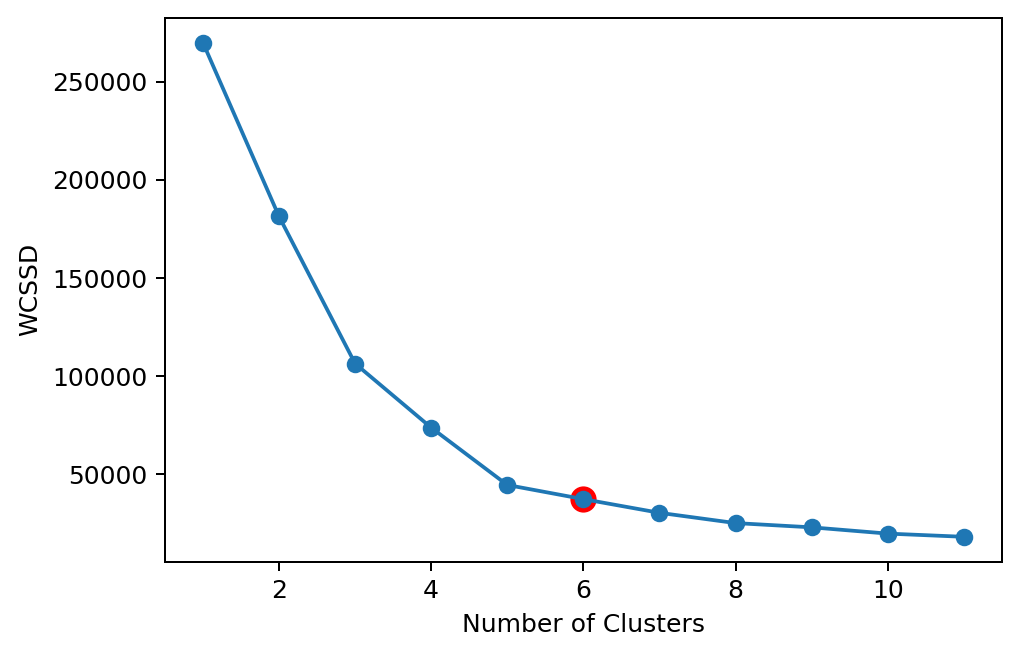

In [20]:
import pandas as pd

# Read the CSV file
customer_data = pd.read_csv('../datasets/mall_customers.csv')
features = customer_data.iloc[:, [3, 4]]

WCSSD = [features.shape[0] * 1000000]

elbow = 0
for n_clusters in range(1, features.shape[0]):

    kmeans = KMeans(n_clusters=n_clusters)

    kmeans.fit(features)

    labels = kmeans.labels_

    centers = kmeans.cluster_centers_
    centers_labels = kmeans.predict(centers)
    
    current_WCSSD = kmeans.inertia_
    if ((WCSSD[-1] - current_WCSSD)/WCSSD[-1] < 0.18) and (elbow == 0):
        print('Elbow-optimal number of clusters: {} - WCSSD: {:.3f}'.format(n_clusters,
                                                                           current_WCSSD))
        elbow = n_clusters
        
    WCSSD.append(current_WCSSD)
    
    # let's add 5 more data points after the elbow
    if elbow > 0 and (n_clusters > (elbow + 4)):
        break
  
plt.xlabel('Number of Clusters')
plt.ylabel('WCSSD')
plt.plot(list(range(1, n_clusters+1)), WCSSD[1:], marker='o')
plt.scatter([elbow], [WCSSD[elbow]], marker='o', s=90, color='r')
plt.show()

Some crazy number of clusters for the shopping mall customers dataset seen last time

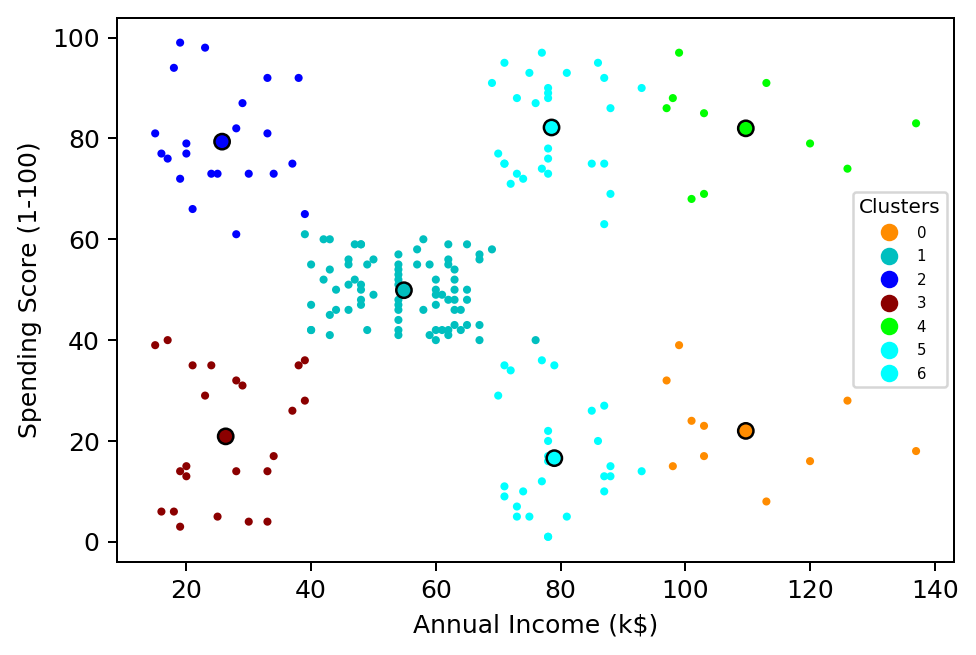

In [21]:
customer_data = pd.read_csv('../datasets/mall_customers.csv')
features = customer_data.iloc[:, [3, 4]]

n_clusters = 7
kmeans = KMeans(n_clusters=n_clusters)

kmeans.fit(features)

labels = kmeans.labels_
centers = kmeans.cluster_centers_
centers_labels = kmeans.predict(centers)


plt.figsize=(10, 3)
plt.xlabel(features.columns[0])
plt.ylabel(features.columns[1])

plt.scatter(features.iloc[:, 0], features.iloc[:, 1], 
            c=labels, marker='.', s=20, cmap=cmap_bold)

scatter = plt.scatter(centers[:,0], centers[:,1], 
                      c=centers_labels, marker='.', s=150, 
                      edgecolors='k',
                      cmap=cmap_bold)

# produce a legend with the unique colors from the scatter
legend = plt.legend(*scatter.legend_elements(), loc="center right", title="Clusters", fontsize=6)
legend.get_title().set_fontsize('8')

## Local minima: no guarantees of reaching the global minimum


Although the EM procedure is <b>guaranteed to monotonically improve the result in each step,</b>
there is no assurance that it will lead to the *global best solution.*
    
In other words, the algorithm can  converge (most likely) to  a **local minimum** of the objective function. 
The globally optimal result may not be achieved and we don't know if we have hit the global optimum or not (i.e., it is a <u>heuristic optimization approach).</u> 
    
- In the previous examples, **starting from different initial center placements was leading to different final clustering solutions.**<br><p>
    
- <u>It is common practice to run K-means multiple times, starting from different initial placements</u> (`n_init` parameter), and take the clustering associated to the lowest loss.

## Linear boundaries between clusters

<u>K-means assumes that points will be closer to their own cluster center than to others based on the Euclidean distance.</u> The algorithm finds cluster centers based on this modeling assumption. 

The results is that the **boundaries between k-means clusters will always be linear** (K-means induces a **Voronoi tassellation** of the feature space). 

This means that the algorithm will often be ineffective if the clusters have complicated geometries that are non-linearly separable.

If you don't believe that the boundary regions are linear, let's compute them ...

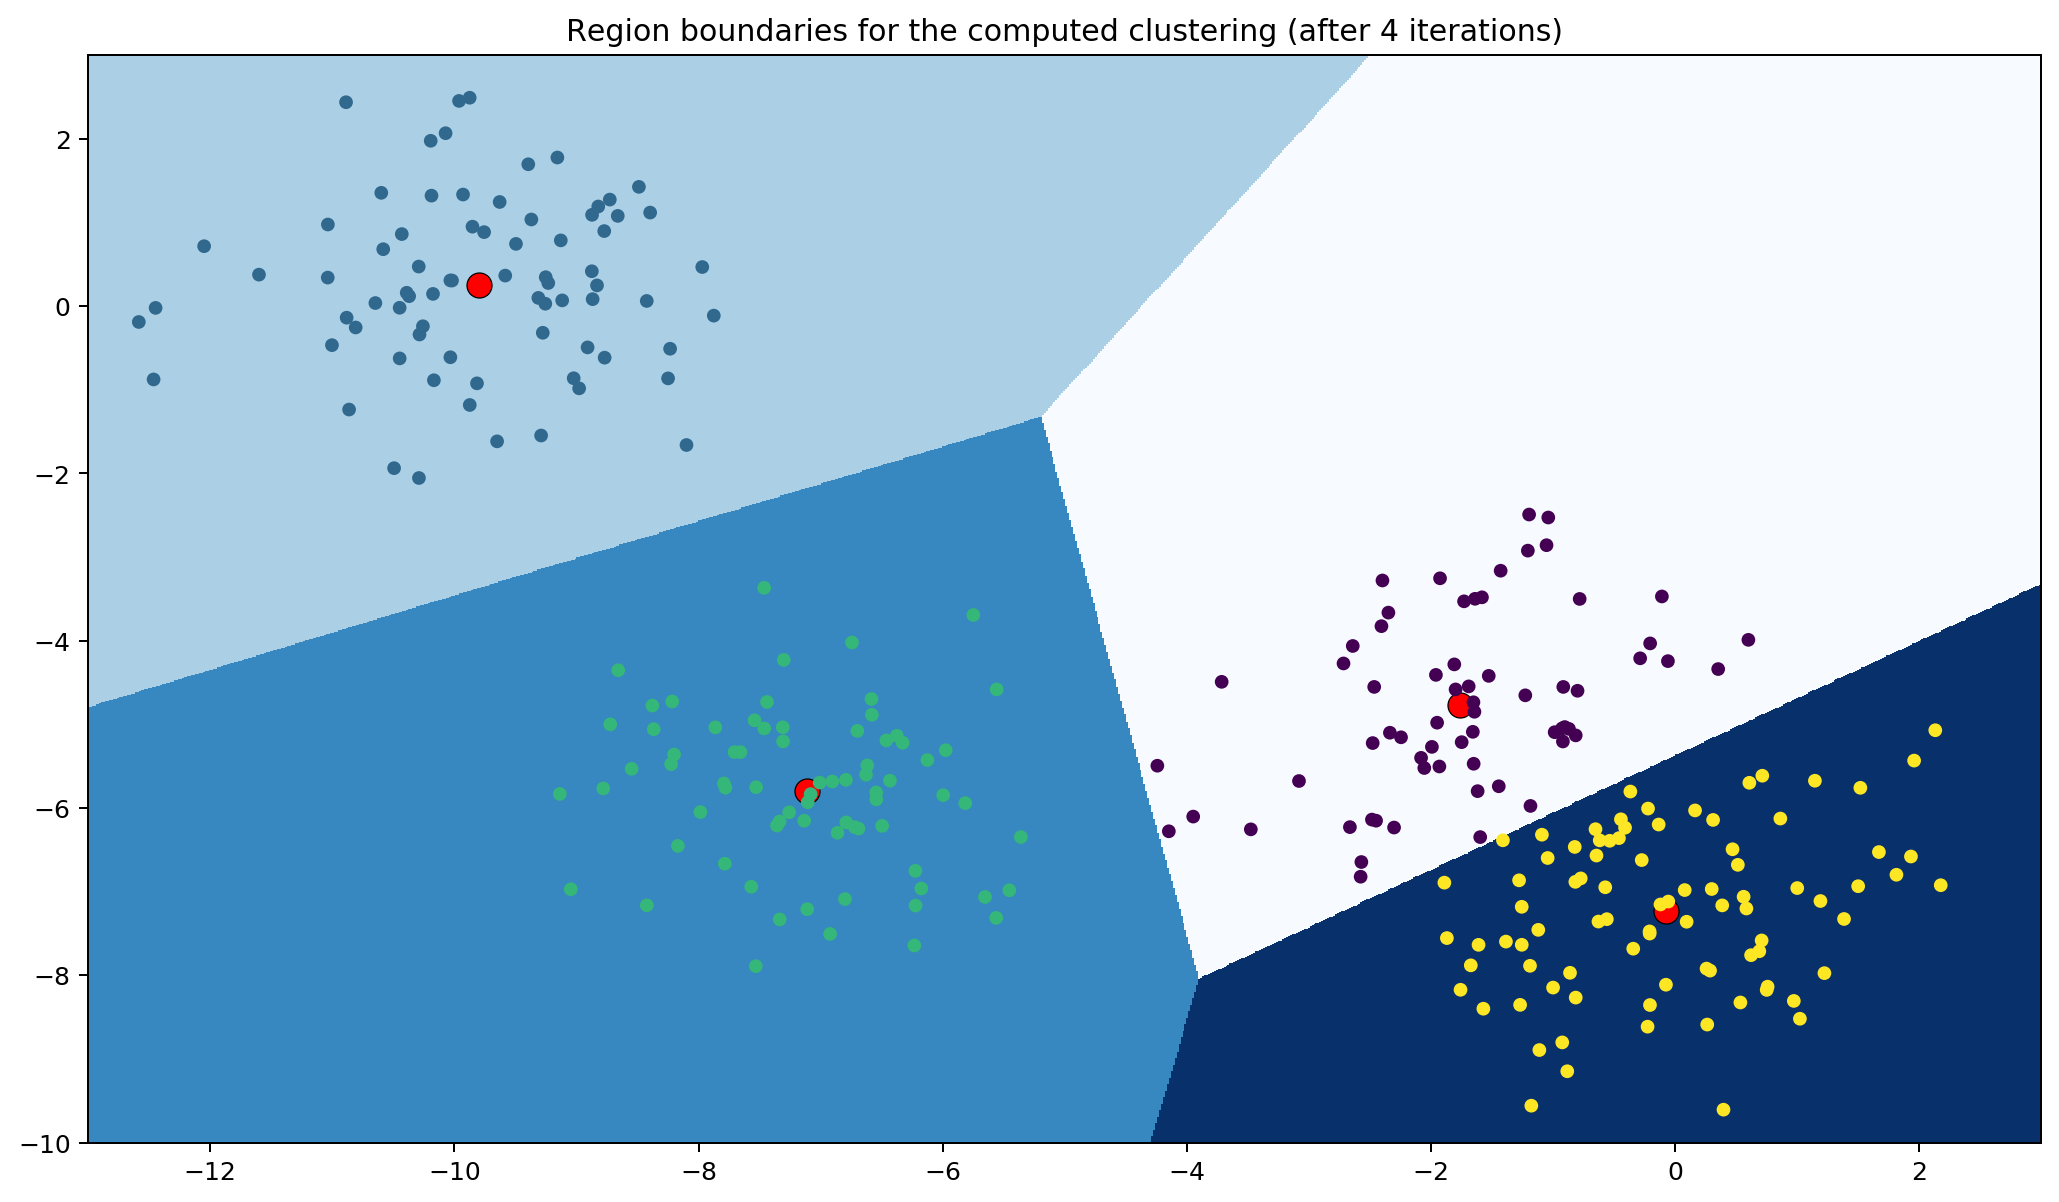

In [22]:
# re-generate the data, four data blobs
features, targets = make_blobs(n_samples=300, n_features=2, centers=4,
                               cluster_std=1, random_state=9)

# find the clusters, assuming the correct number
n_clusters = 4

kmeans = KMeans(init='random', n_clusters=n_clusters, random_state=754)

kmeans.fit(features)
centers = kmeans.cluster_centers_   
labels = kmeans.labels_

# get feature ranges for creating a meshgrid
feature_ranges = np.array([ (np.floor(np.min(features[:, i])), 
                             np.ceil(np.max(features[:, i]))) 
                             for i in range(2)]  )

num_of_pts = 1000

# a meshgrid of values for (f1, f2), these are the points where 
# the clustering algorithm will be queried and that we want to visualize
xx, yy = np.meshgrid( np.linspace(feature_ranges[0, 0],
                                  feature_ranges[0, 1], 
                                  num=num_of_pts),
                      np.linspace(feature_ranges[1, 0],
                                  feature_ranges[1, 1], 
                                  num=num_of_pts))
#print(xx.shape, yy.shape)

# get the labels of all the points in the meshgrid
labels_mesh = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# reshape the array to be of the same dimesion as xx and yy
labels_mesh = labels_mesh.reshape(xx.shape)

plt.figure(figsize=(14, 8))

# the color map automatically assigns a different color to the 
# different values of labels / cluster 
plt.pcolormesh(xx, yy, labels_mesh, cmap='Blues')

# Add the centers
plt.scatter(centers[:, 0], centers[:, 1], c='red', edgecolor='black', linewidth=0.5, s=100, alpha=1)

# Add the original data points 
plt.title('Region boundaries for the computed clustering (after {} iterations)'.format(kmeans.n_iter_))
plt.scatter(features[:, 0], features[:, 1], c=labels, s=20, cmap='viridis')
plt.show()

We can plot the region boundaries in a maybe easier way using **Voronoi methods** (that will confirm the empirical plotting that we have obtained in the previous step)

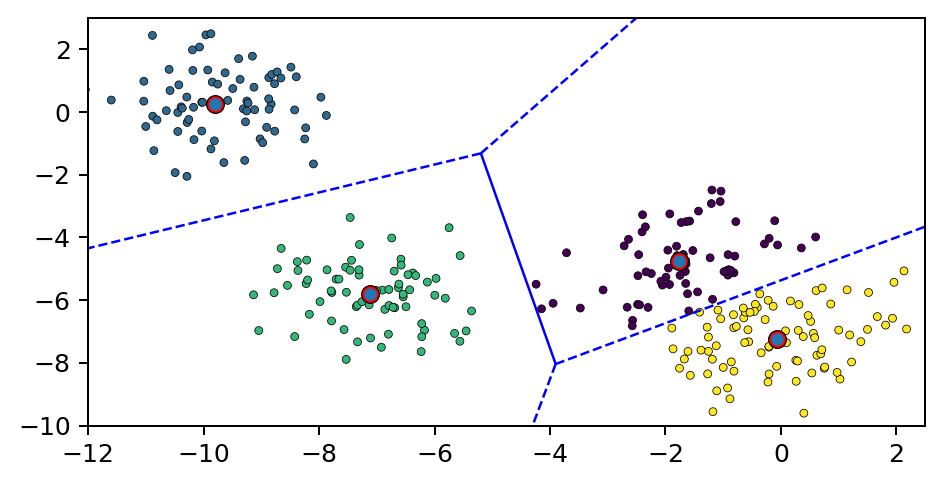

In [80]:
# re-generate the data, four data blobs
features, targets = make_blobs(n_samples=300, n_features=2, centers=4,
                               cluster_std=1, random_state=9)

n_clusters = 4

kmeans = KMeans(init='random', n_clusters=n_clusters, random_state=754)

kmeans.fit(features)
centers = kmeans.cluster_centers_   
labels = kmeans.labels_

# compute te Voronoi tassellation using cluster centers as cell centers
from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(centers)

# get the 2D plot of the Voronoi diagram
figure = voronoi_plot_2d(vor, show_vertices=False, point_size=8, line_colors='blue')

figure.set_size_inches(6,3)

# add the feature data points to the plot
plt.scatter(features[:, 0], features[:, 1], c=labels, 
            s=10, edgecolor='black', linewidth=0.3, 
            cmap='viridis')

# add the centers (because there's no control on the formatting of the centers in voronoi_plot_2d()
plt.scatter(centers[:, 0], centers[:, 1], c='red', edgecolor='black', linewidth=0.5, s=50, alpha=1)

# set figure's limits based on the values of the fatures (that are unknown to voronoi_plot_2d())
plt.xlim(-12, 2.5)
plt.ylim(-10, 3)

plt.show()

Display of the clustering boundaries by colorizing the Voronoi cells.

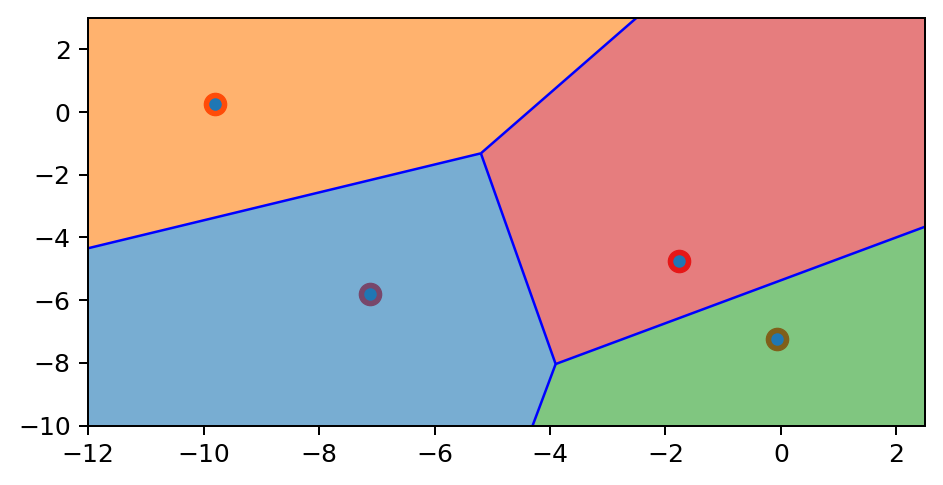

In [81]:
# re-generate the data, four data blobs
features, targets = make_blobs(n_samples=300, n_features=2, centers=4,
                               cluster_std=1, random_state=9)

n_clusters = 4

kmeans = KMeans(init='random', n_clusters=n_clusters, random_state=754)

kmeans.fit(features)
centers = kmeans.cluster_centers_   
labels = kmeans.labels_

# add four 'distant' points, one for each side of the region, to make a nice plot
# with all the boundary regions
centers = np.append(centers, [[999,999], [-999,999], [999,-999], [-999,-999]], axis = 0)

from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(centers)

figure = voronoi_plot_2d(vor, show_vertices=False, point_size=8, line_colors='blue')

figure.set_size_inches(6,3)

plt.scatter(centers[:, 0], centers[:, 1], c='red', edgecolor='red', linewidth=0.5, s=80, alpha=1)

# colorize
for region in vor.regions:
    if not -1 in region:
        polygon = [vor.vertices[i] for i in region]
        plt.fill(*zip(*polygon), alpha=0.6) #color='r')

# figure's limits are set by figure()
plt.xlim(-12, 2.5)
plt.ylim(-10, 3)

plt.show()

Some fun with Voronoi :-)

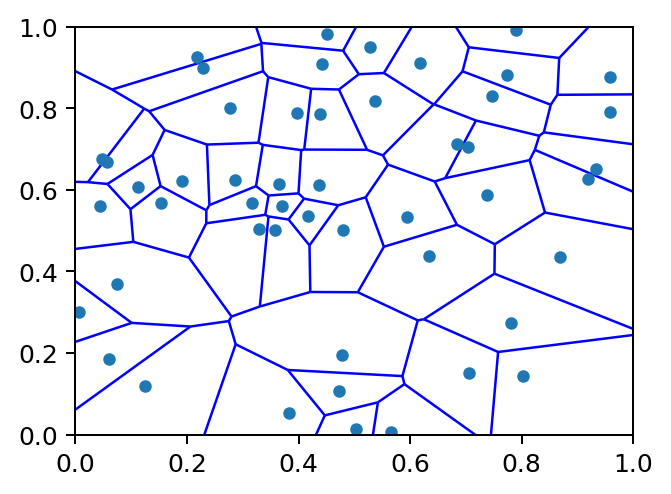

In [82]:
import matplotlib.pyplot as plt

np.random.seed(1234)
points = np.random.rand(50,2) #random center points

# add four 'distant' points, one for each side of the region, to make a nice plot
# with all the boundary regions
points = np.append(points, [[999,999], [-999,999], [999,-999], [-999,-999]], axis = 0)

from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(points)

figure = voronoi_plot_2d(vor, show_vertices=False, point_size=8, line_colors='blue')

figure.set_size_inches(4,3)

colorize = False
if colorize:
    for region in vor.regions:
        if not -1 in region:
            polygon = [vor.vertices[i] for i in region]
            plt.fill(*zip(*polygon)) #color='r')

# fix the range of axes
plt.xlim([0,1]), plt.ylim([0,1])

plt.show()

Unfortunately, <u>linear boundaries are not necessarily the correct ones for data distributed according to complicated geometries,</u> like in the case of the double moon data distribution below.

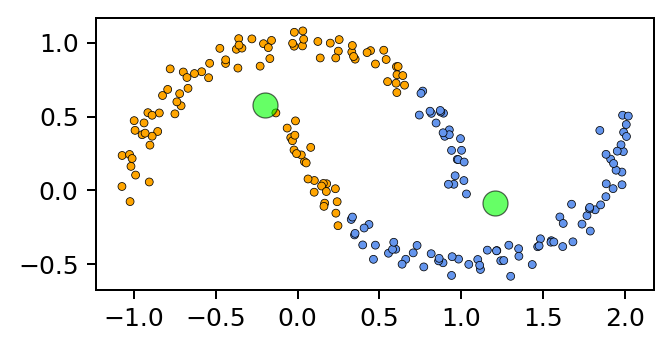

In [83]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'blue'])

from sklearn.datasets import make_moons

features, targets = make_moons(200, noise=.05, random_state=0)

n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=0)

kmeans.fit(features)
centers = kmeans.cluster_centers_   
labels = kmeans.labels_

plt.figure(figsize=(4, 2))
plt.scatter(features[:, 0], features[:, 1], c=labels, 
            s=10, edgecolor='black', linewidth=0.3, 
            cmap=cmap_light)
plt.scatter(centers[:, 0], centers[:, 1], c='lime', edgecolor='black', 
            linewidth=0.5, s=100, alpha=0.6)
plt.show()

## Imbalanced datasets: prior cluster probabilities are significantly different

K-Means relies on the *assumption* that **each cluster features more or less an equal number of sample data.**

In other words, the <u>dataset is well *balanced* with respect to the number of clusters:</u> the prior probability for all $K$ clusters is roughly the same, such that each cluster has roughly equal number of observations. 

Let's consider what happens when data is imbalanced

<div>
  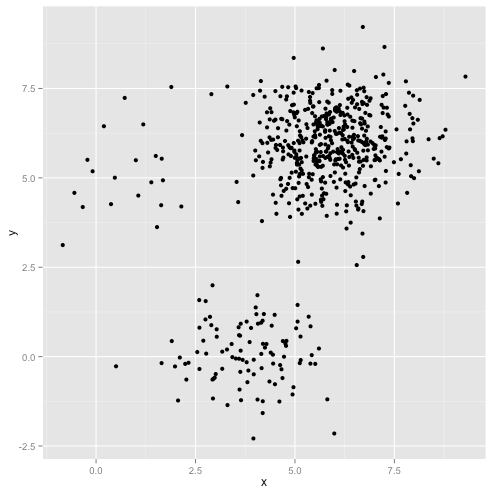
</div>!

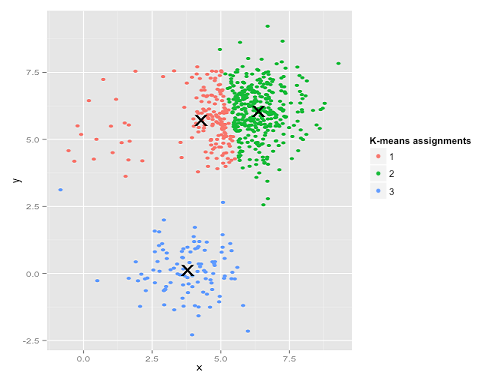

With the goal of minimizing the within-cluster sum of squares, the K-Means algorithm gives more "weight" to larger clusters. In practice, it is convenient to let that small cluster to the left end up far away from any center, while it is strategically convenient to place the centers to "split up" a much larger cluster. 

In these case, we may easily observe accuracy scores very high (if we would use labeled data), while indeed one of the class with a few examples is systematically misclassified.

## Unequal variances, covariances,  and scaling issues

Variances of all variables should be the same, or quite comparable, such that a nice *spherical* distribution of the data about the centers happen.

When clusters have different variances, clustering might go wrong.

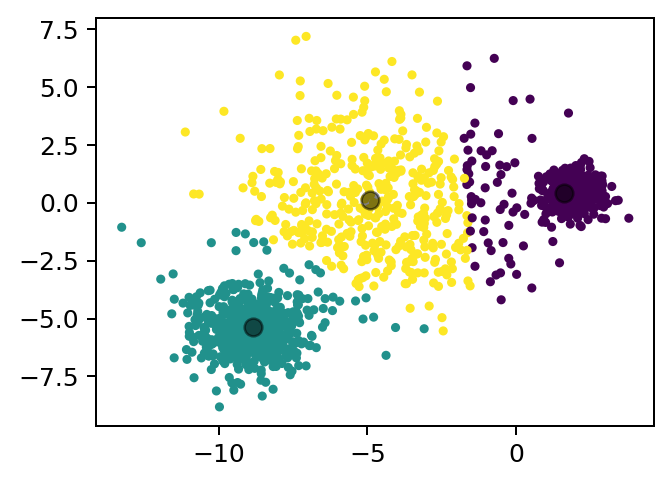

In [84]:
n_samples = 1500
random_state = 170

# Different variance
features, targets = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)

kmeans = KMeans(n_clusters=3, random_state=random_state)

kmeans.fit(features)

labels = kmeans.labels_
centers = kmeans.cluster_centers_

plt.figure(figsize=(4, 3))
plt.scatter(features[:, 0], features[:, 1], c=labels, s=7, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=0.5)
plt.show()



Same size, but different variances, another example, with the linear boundary<br><p>

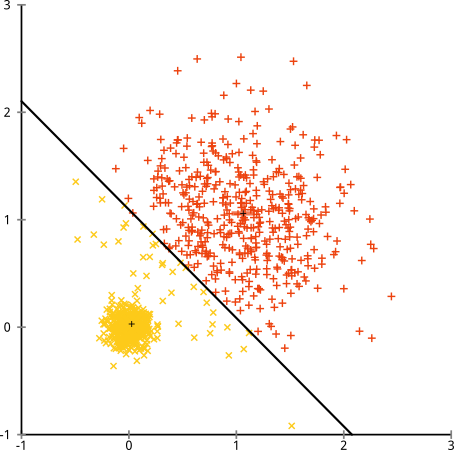

Anisotropically distributed data (i.e., high covariances in the data)

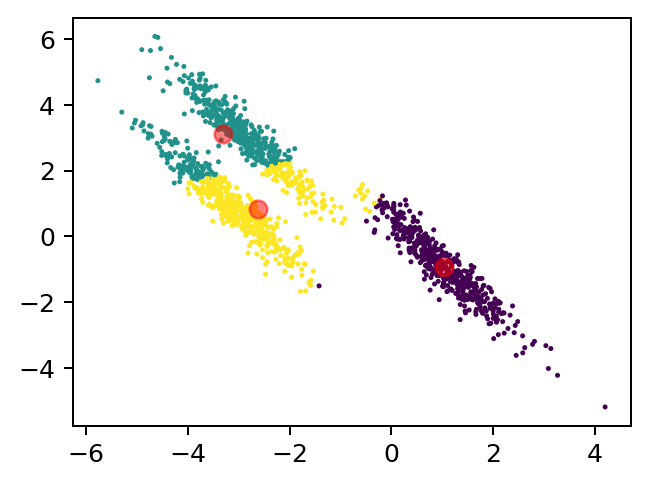

In [85]:
n_samples = 1500
random_state = 170
features, targets = make_blobs(n_samples=n_samples, random_state=random_state)

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
features = np.dot(features, transformation)

kmeans = KMeans(n_clusters=3, random_state=random_state)

kmeans.fit(features)

labels = kmeans.labels_
centers = kmeans.cluster_centers_

plt.figure(figsize=(4, 3))
plt.scatter(features[:, 0], features[:, 1], c=labels, s=1, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50, alpha=0.5)
plt.show()


A non-spherical cluster *might* seems **spherical** (but it is not indeed!)

<div>
  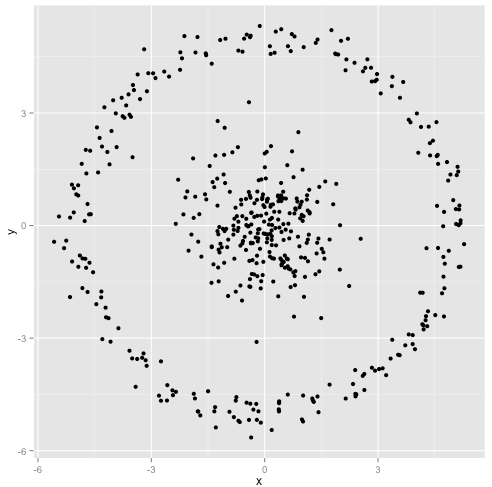
</div>!


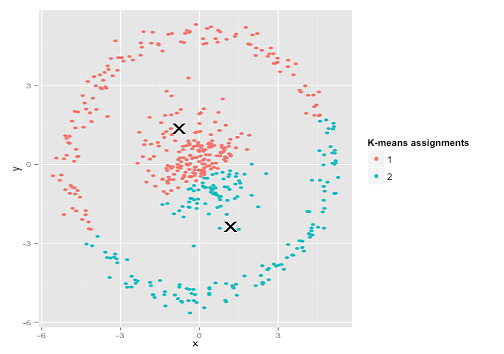

Transforming the data into *polar coordinates,* it would work!<br><p>


<div>
  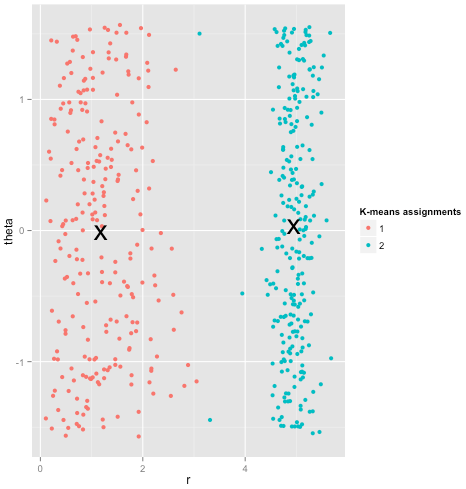
</div>

## Computational issues for large datasets

K-Means can be **slow for large datasets** due to the fact that at each iteration the <u>whole dataset must be accessed in the Expectation and Maximization steps.</u>

The algorithm has an $O(n^2)$ time complexity, where $n$ is the number of data samples.


However, <u>the requirement to use all data at each iteration can be <i>relaxed</i></u> (of course at the potential expenses of the quality of the final solution, in terms of ending up in some strongly sub-optimal minimum). 

for example, you might just use a subset of the data to update the cluster centers at each step. 

This is the idea behind **batch-based K-Means algorithms**, that make use of only a <u>selected subset of the data at each E and/or M steps. </u>

`sklearn.cluster.MiniBatchKMeans` precisely implements this way of proceeding, using the same interface as KMeans plus parameters to specify the batches.

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html